# > Initial setting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# > Exploratory Data Analysis

## >> Skills

In [2]:
df1 = pd.read_excel("datasets/skills.xlsx")
df1.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,Category
0,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,IM,Importance,4.12,8,0.1250,3.8800,4.3700,N,NaN,08/2023,Analyst,soft
1,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,LV,Level,4.62,8,0.1830,4.2664,4.9836,N,N,08/2023,Analyst,soft
2,11-1011.00,Chief Executives,2.A.1.b,Active Listening,IM,Importance,4.00,8,0.0000,4.0000,4.0000,N,NaN,08/2023,Analyst,soft
3,11-1011.00,Chief Executives,2.A.1.b,Active Listening,LV,Level,4.75,8,0.1637,4.4292,5.0708,N,N,08/2023,Analyst,soft
4,11-1011.00,Chief Executives,2.A.1.c,Writing,IM,Importance,4.12,8,0.1250,3.8800,4.3700,N,NaN,08/2023,Analyst,soft


In [3]:
# select relevant columns
skills_raw = df1.copy()
skills_raw = skills_raw.iloc[:, [1, 3, 5, 6, 12, 15]]  # adjust column indices if needed

skills = skills_raw.copy()

# unpivot the element name to have two columns
skills = skills.pivot_table(
    index=["Title", "Element Name"],
    columns="Scale Name",
    values="Data Value"
).reset_index()

# merge Not Relevant and Category back
nr = df1[df1['Scale Name']=='Level'][['Title','Element Name','Not Relevant','Category']]
skills = skills.merge(nr, on=['Title','Element Name'], how='left')

# add score as average of Importance and Level
skills['score'] = skills[['Importance', 'Level']].mean(axis=1)

# filter only relevant skills
skills = skills[skills['Not Relevant'] != "Y"]

# separate soft and tech skills
soft_df = skills[skills['Category'] == 'soft'][['Title', 'Element Name', 'score']].rename(
    columns={'Title': 'title', 'Element Name': 'soft_skill', 'score': 'soft_score'}
)

tech_df = skills[skills['Category'] == 'tech'][['Title', 'Element Name', 'score']].rename(
    columns={'Title': 'title', 'Element Name': 'tech_skill', 'score': 'tech_score'}
)

print(soft_df.head())
print(tech_df.head())

                      title               soft_skill  soft_score
0  Accountants and Auditors          Active Learning       3.310
1  Accountants and Auditors         Active Listening       3.815
2  Accountants and Auditors  Complex Problem Solving       3.440
3  Accountants and Auditors             Coordination       3.250
4  Accountants and Auditors        Critical Thinking       3.935
                       title                tech_skill  tech_score
14  Accountants and Auditors               Mathematics       3.500
18  Accountants and Auditors       Operations Analysis       1.250
19  Accountants and Auditors     Operations Monitoring       1.565
21  Accountants and Auditors               Programming       1.875
22  Accountants and Auditors  Quality Control Analysis       1.500


In [4]:
# showing head for 'Human Resources Managers' Title
display(skills[skills['Title'] == 'Human Resources Managers'].head(2))

# showing only tech Category
display(skills[(skills['Title'] == 'Human Resources Managers') & (skills['Category'] == 'tech')].head(2))

,Title,Element Name,Importance,Level,Not Relevant,Category,score
15050,Human Resources Managers,Active Learning,4.00,4.12,N,soft,4.06
15051,Human Resources Managers,Active Listening,4.38,4.12,N,soft,4.25


,Title,Element Name,Importance,Level,Not Relevant,Category,score
15064,Human Resources Managers,Mathematics,3.00,3.00,N,tech,3.000
15068,Human Resources Managers,Operations Analysis,2.38,2.25,N,tech,2.315


In [5]:
# aggregate for each Title for soft skills
soft = soft_df.groupby('title')['soft_score'].mean().reset_index()
print(soft.head())

print(f"Total job roles: {soft.shape[0]}")

                      title  soft_score
0  Accountants and Auditors    3.234750
1                    Actors    2.983056
2                 Actuaries    3.440750
3            Acupuncturists    2.984500
4         Acute Care Nurses    3.643250
Total job roles: 894


In [6]:
# aggregate for each Title for tech skills
tech = tech_df.groupby('title')['tech_score'].mean().reset_index()
print(tech.head())

print(f"Total job roles: {tech.shape[0]}")

                      title  tech_score
0  Accountants and Auditors    2.133750
1                    Actors    1.546250
2                 Actuaries    2.818889
3            Acupuncturists    1.637727
4         Acute Care Nurses    2.416250
Total job roles: 894


In [7]:
# summary of tech skills
print("Soft Skills Summary:")
print(soft['soft_score'].describe())
print("Tech Skills Summary:")   
print(tech['tech_score'].describe())   

Soft Skills Summary:
count    894.000000
mean       2.994133
std        0.481233
min        1.749474
25%        2.595687
50%        3.004875
75%        3.419000
max        4.331500
Name: soft_score, dtype: float64
Tech Skills Summary:
count    894.000000
mean       2.180541
std        0.419605
min        0.970000
25%        1.855932
50%        2.169712
75%        2.468554
max        3.604000
Name: tech_score, dtype: float64


## >> AI Labor Index

In [8]:
df2 = pd.read_excel("datasets/ali.xlsx")
df2.head()

,task,suboccupation,complexity,automation,llm_ai,robotics,software,accountability,interpersonal,tacit_knowledge,licensing,decision_making,task_nature,impact_areas
0,"Bill customers for repair work, and collect pa...",Home Appliance Repairers,2,5,0,0,5,3,No,No,No,No,digital,"financial\nreputational, financial, reputational"
1,Compare instrument pitches with tuning tool pi...,Musical Instrument Repairers and Tuners,2,5,0,0,5,3,No,Yes,No,No,physical,"financial\nreputational, financial, reputational"
2,Order parts needed for machine repairs.,"Coin, Vending, and Amusement Machine Servicers...",2,5,0,0,5,3,No,No,No,No,digital,"financial, financial"
3,Maintain records of machine maintenance and re...,"Coin, Vending, and Amusement Machine Servicers...",2,5,2,0,5,3,No,No,No,No,digital,"regulatory\nfinancial\nlegal, regulatory, fina..."
4,Keep records of employees' attendance and hour...,First-Line Supervisors of Production and Opera...,2,5,0,0,5,3,No,No,No,No,digital,"financial\nregulatory\nreputational, financial..."


In [9]:
ali = df2.copy()
ali = ali.iloc[:,  [0, 1, 2, 3, 4, 5, 6]]
ali.head()

,task,suboccupation,complexity,automation,llm_ai,robotics,software
0,"Bill customers for repair work, and collect pa...",Home Appliance Repairers,2,5,0,0,5
1,Compare instrument pitches with tuning tool pi...,Musical Instrument Repairers and Tuners,2,5,0,0,5
2,Order parts needed for machine repairs.,"Coin, Vending, and Amusement Machine Servicers...",2,5,0,0,5
3,Maintain records of machine maintenance and re...,"Coin, Vending, and Amusement Machine Servicers...",2,5,2,0,5
4,Keep records of employees' attendance and hour...,First-Line Supervisors of Production and Opera...,2,5,0,0,5


In [10]:
# show ali.head only for 'Human Resources Managers' Title
display(ali[ali['suboccupation'] == 'Human Resources Managers'].head())

# show summary of robotics variable for 'Human Resources Managers' Title
print("Robotics Skill Summary for Human Resources Managers:")
print(ali[ali['suboccupation'] == 'Human Resources Managers']['robotics'].describe())

,task,suboccupation,complexity,automation,llm_ai,robotics,software
4492,Maintain records and compile statistical repor...,Human Resources Managers,2,4,3,0,5
4493,Provide current and prospective employees with...,Human Resources Managers,2,4,4,0,4
4494,Prepare and follow budgets for personnel opera...,Human Resources Managers,3,4,2,0,4
13328,Serve as a link between management and employe...,Human Resources Managers,4,3,3,0,3
13329,"Identify staff vacancies and recruit, intervie...",Human Resources Managers,4,3,3,0,4


Robotics Skill Summary for Human Resources Managers:
count    26.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: robotics, dtype: float64


In [11]:
# aggregate by suboccupation with average of llm_ai, software, and automation columns
ali = (
    ali.groupby("suboccupation")
    .agg(
        llm_ai=("llm_ai", "mean"),
        software=("software", "mean"),
        automation=("automation", "mean"),
        complexity=("complexity", "mean")
    )
    .reset_index()
)
print(ali.head())
print(f"Total job roles: {ali.shape[0]}")

              suboccupation    llm_ai  software  automation  complexity
0  Accountants and Auditors  2.965517  3.758621    3.344828    3.827586
1                    Actors  1.722222  0.888889    1.722222    4.611111
2                 Actuaries  2.666667  2.866667    2.800000    4.533333
3            Acupuncturists  2.000000  2.111111    2.611111    3.722222
4         Acute Care Nurses  2.120000  1.920000    2.400000    4.080000
Total job roles: 923


## >> Merge dataset

In [12]:
# merge between ali, soft, and tech skills
df = soft
df = df.merge(tech, on="title", how="inner")
df = df.merge(ali, left_on="title", right_on="suboccupation", how="inner")
df.head()

,title,soft_score,tech_score,suboccupation,llm_ai,software,automation,complexity
0,Accountants and Auditors,3.234750,2.133750,Accountants and Auditors,2.965517,3.758621,3.344828,3.827586
1,Actors,2.983056,1.546250,Actors,1.722222,0.888889,1.722222,4.611111
2,Actuaries,3.440750,2.818889,Actuaries,2.666667,2.866667,2.800000,4.533333
3,Acupuncturists,2.984500,1.637727,Acupuncturists,2.000000,2.111111,2.611111,3.722222
4,Acute Care Nurses,3.643250,2.416250,Acute Care Nurses,2.120000,1.920000,2.400000,4.080000


In [13]:
print(f"Total job roles: {df.shape[0]}")

Total job roles: 894


In [14]:
# check NA values
print(df.isna().sum())

title            0
soft_score       0
tech_score       0
suboccupation    0
llm_ai           0
software         0
automation       0
complexity       0
dtype: int64


## >> Correlation Matrix

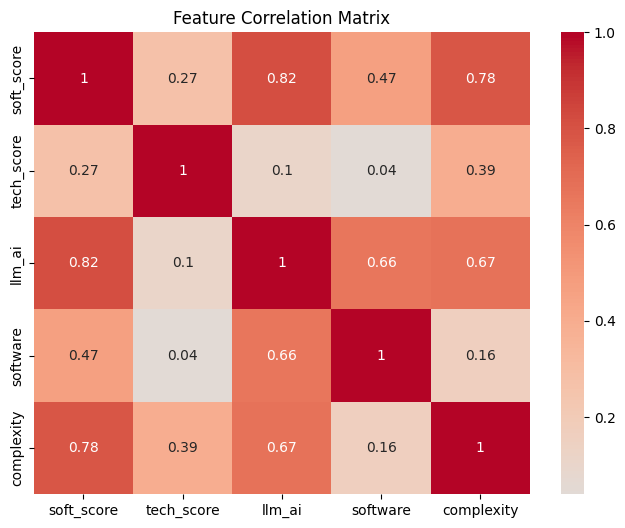

In [15]:
num_cols = ['soft_score', 'tech_score', 'llm_ai', 'software', 'complexity']
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

    Low correlation between soft and tech skills score, but is still statistically meaningful, so we can do MANOVA first, then separate regressions.

# > Multivariate Analysis

In [16]:
from statsmodels.multivariate.manova import MANOVA

manova = MANOVA.from_formula(
    'soft_score + tech_score ~ complexity + llm_ai + software',
    data=df
)
print(manova.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.6743 2.0000 889.0000 214.6798 0.0000
         Pillai's trace 0.3257 2.0000 889.0000 214.6798 0.0000
 Hotelling-Lawley trace 0.4830 2.0000 889.0000 214.6798 0.0000
    Roy's greatest root 0.4830 2.0000 889.0000 214.6798 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       complexity       Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.6021 2.0000 889.0000 293.7996 0.0000
         Pillai's trace 0.3979 2.0000 889.0000 293.7996 0.0000
 Hotelling-

# > Regression

## >> Recipe

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

# Preprocessing steps
preprocessor = Pipeline([
    ('scaler', StandardScaler()),
    ('nzv', VarianceThreshold(threshold=1e-4))
])

# OLS, Ridge, Lasso, and Elastic Net Pipelines
ols = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

ridge = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', RidgeCV(alphas=np.logspace(-3, 3, 50), cv=10))
])

lasso = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LassoCV(alphas=np.logspace(-3, 3, 50), cv=10, max_iter=5000))
])

elastic = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', ElasticNetCV(
        alphas=np.logspace(-3, 3, 50),
        l1_ratio=[.1, .5, .9],
        cv=10,
        max_iter=5000
    ))
])

## >> Soft Skills Model Fit

In [18]:
from sklearn.model_selection import train_test_split

# Define target and features
y = df[['soft_score']]
X = df[['llm_ai', 'software', 'complexity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=15
)

In [19]:
from sklearn.metrics import mean_squared_error

models = {
    "OLS": ols,
    "Ridge": ridge,
    "Lasso": lasso,
    "ElasticNet": elastic
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    reg = model.named_steps['regressor']
    
    results.append({
        "Model": name,
        "Alpha": getattr(reg, 'alpha_', np.nan),
        "L1 Ratio": getattr(reg, 'l1_ratio_', np.nan),
        "Train R²": train_r2,
        "Test R²": test_r2,
        "Test MSE": mse
    })

comparison_df = pd.DataFrame(results).round(4)
print(comparison_df)

        Model    Alpha  L1 Ratio  Train R²  Test R²  Test MSE
0         OLS      NaN       NaN    0.7678   0.7718    0.0551
1       Ridge  14.5635       NaN    0.7676   0.7715    0.0552
2       Lasso   0.0010       NaN    0.7678   0.7718    0.0551
3  ElasticNet   0.0054       0.1    0.7678   0.7718    0.0551


In [20]:
ols.fit(X, y)

coef = ols.named_steps['regressor'].coef_.ravel()

coef_df = pd.DataFrame({
    'skill_type': X.columns,
    'standardized_coefficient': coef
}).sort_values(by='standardized_coefficient', ascending=False)

print(coef_df)

   skill_type  standardized_coefficient
2  complexity                  0.228192
0      llm_ai                  0.205221
1    software                  0.053065


In [21]:
# Fit final model on full data
ols.fit(X, y.values.ravel())

# Predict AI exposure
df['soft_score_pred'] = ols.predict(X)

# Inspect HR roles
hr_managers = [
    'Compensation and Benefits Managers',
    'Training and Development Managers',
    'Human Resources Managers'
]

hr_roles = df[df['title'].isin(hr_managers)][
    ['title', 'soft_score', 'soft_score_pred']
]
hr_roles

,title,soft_score,soft_score_pred
154,Compensation and Benefits Managers,3.50550,3.476373
430,Human Resources Managers,3.96225,3.448169
849,Training and Development Managers,3.83750,3.507200


## >> Tech Skills Model Fit

In [22]:
# Define target and features
y = df[['tech_score']]
X = df[['llm_ai', 'software', 'complexity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=15
)

In [23]:
models = {
    "OLS": ols,
    "Ridge": ridge,
    "Lasso": lasso,
    "ElasticNet": elastic
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    reg = model.named_steps['regressor']
    
    results.append({
        "Model": name,
        "Alpha": getattr(reg, 'alpha_', np.nan),
        "L1 Ratio": getattr(reg, 'l1_ratio_', np.nan),
        "Train R²": train_r2,
        "Test R²": test_r2,
        "Test MSE": mse
    })

comparison_df = pd.DataFrame(results).round(4)
print(comparison_df)

        Model   Alpha  L1 Ratio  Train R²  Test R²  Test MSE
0         OLS     NaN       NaN    0.2474   0.2602    0.1152
1       Ridge  2.6827       NaN    0.2473   0.2585    0.1155
2       Lasso  0.0010       NaN    0.2473   0.2583    0.1155
3  ElasticNet  0.0010       0.1    0.2474   0.2596    0.1153


In [24]:
ols.fit(X, y)

coef = ols.named_steps['regressor'].coef_.ravel()

coef_df = pd.DataFrame({
    'skill_type': X.columns,
    'standardized_coefficient': coef
}).sort_values(by='standardized_coefficient', ascending=False)

print(coef_df)

   skill_type  standardized_coefficient
2  complexity                  0.323280
1    software                  0.141070
0      llm_ai                 -0.266988


In [25]:
# Fit final model on full data
ols.fit(X, y.values.ravel())

# Predict AI exposure
df['tech_score_pred'] = ols.predict(X)

# Inspect HR roles
hr_managers = [
    'Compensation and Benefits Managers',
    'Training and Development Managers',
    'Human Resources Managers'
]

hr_roles = df[df['title'].isin(hr_managers)][
    ['title', 'tech_score', 'tech_score_pred']
]
hr_roles

,title,tech_score,tech_score_pred
154,Compensation and Benefits Managers,2.188125,2.318550
430,Human Resources Managers,2.076667,2.242575
849,Training and Development Managers,2.175000,2.211497


## >> Models Diagnostic

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use the same predictors used in all models
X_diag = df[['complexity', 'llm_ai', 'software']]

# Optional: standardize if your modeling did
X_diag_scaled = pd.DataFrame(
    StandardScaler().fit_transform(X_diag),
    columns=X_diag.columns,
    index=X_diag.index
)

In [27]:
vif_df = pd.DataFrame({
    'feature': X_diag_scaled.columns,
    'VIF': [
        variance_inflation_factor(X_diag_scaled.values, i)
        for i in range(X_diag_scaled.shape[1])
    ]
}).sort_values(by='VIF', ascending=False).reset_index(drop=True)

print(vif_df)

      feature       VIF
0      llm_ai  4.257273
1  complexity  2.480880
2    software  2.383952


    VIF values for all predictors were below conventional thresholds, indicating no problematic multicollinearity.

In [28]:
non_zero_lasso = np.sum(lasso.named_steps['regressor'].coef_ != 0)
print("Non-zero coefficients (Lasso):", non_zero_lasso)

non_zero_elastic = np.sum(elastic.named_steps['regressor'].coef_ != 0)
print("Non-zero coefficients (ElasticNet):", non_zero_elastic)

Non-zero coefficients (Lasso): 3
Non-zero coefficients (ElasticNet): 3


	- No variable selection occurred
	- Regularization confirms stability, not sparsity
	- This supports keeping OLS as the main interpretive model

# > Unsupervised Clustering

In [32]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import pandas as pd

df_flag = df.copy()
X_cluster = df[['llm_ai', 'software', 'complexity']]

# Cluster occupations by skill+AI profiles
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_flag['cluster'] = kmeans.fit_predict(X_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotly
plot_data = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'cluster': df_flag['cluster'],
    'title': df_flag['title'],
    'automation': df_flag['automation'],
    'complexity': df_flag['complexity'],
    'soft_score': df_flag['soft_score'],
    'tech_score': df_flag['tech_score']
})

# Visualize clusters
fig = px.scatter(plot_data, 
                 x='PC1', y='PC2', 
                 color='cluster',
                 hover_data=['title', 'automation', 'complexity', 'soft_score', 'tech_score'],
                 title="Occupation Clusters by Skills, Task Complexity, and AI Exposure",
                 color_continuous_scale='viridis')
fig.show()

# HR manager cluster analysis
hr_cluster_stats = df_flag[df_flag['title'].isin(hr_managers)].groupby('cluster').agg({
    'automation': 'mean',
    'soft_score': 'mean', 
    'tech_score': 'mean',
    'title': 'count'
}).round(3).rename(columns={'title': 'HR_count'})
print("HR Managers by Cluster:")
print(hr_cluster_stats)


HR Managers by Cluster:
         automation  soft_score  tech_score  HR_count
cluster                                              
3             2.934       3.768       2.147         3


In [35]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

df_flag['is_hr_manager'] = df_flag['title'].isin(hr_managers)

plot_data = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'cluster': df_flag['cluster'],
    'title': df_flag['title'],
    'automation': df_flag['automation'],
    'complexity': df_flag['complexity'],
    'soft_score': df_flag['soft_score'],
    'tech_score': df_flag['tech_score'],
    'is_hr_manager': df_flag['is_hr_manager']
})

# Calculate cluster centroids (average lines)
cluster_centroids = plot_data.groupby('cluster')[['PC1', 'PC2']].mean().reset_index()

# Base scatter plot - GRAY points + RED HR
fig = px.scatter(plot_data, 
                 x='PC1', y='PC2', 
                 color='is_hr_manager',
                 color_discrete_map={False: 'lightgray', True: '#e74c3c'},
                 size='automation',
                 hover_data=['title', 'cluster', 'complexity', 'soft_score', 'tech_score'],
                 title="All Occupations: HR Managers (Red) + Cluster Centers",
                 labels={'is_hr_manager': ''},
                 size_max=12)

fig.update_traces(marker=dict(line=dict(width=0.5, color='white')))

# Add cluster center lines (black diamonds)
for cluster_id in sorted(cluster_centroids['cluster']):
    centroid = cluster_centroids[cluster_centroids['cluster'] == cluster_id]
    
    # Cluster center point
    fig.add_trace(go.Scatter(
        x=centroid['PC1'], y=centroid['PC2'],
        mode='markers+text',
        marker=dict(size=18, symbol='diamond', color='black', line=dict(width=2, color='white')),
        text=[f'C{cluster_id}'],
        textposition="middle center",
        textfont=dict(size=12, color='white'),
        name=f'Cluster {cluster_id}',
        showlegend=True,
        hovertemplate=f'<b>Cluster {cluster_id} Center</b><extra></extra>'
    ))

# Clean layout
fig.update_layout(
    legend=dict(title="HR Manager", x=0.02, y=0.98),
    annotations=[
        dict(text="Red = HR-related roles | ◆ Black diamonds = cluster centers", 
             x=0.01, y=0.02, xref="paper", yref="paper", showarrow=False,
             font=dict(size=11), bgcolor="rgba(255,255,255,0.9)")
    ],
    showlegend=True,
    width=800, height=600
)

fig.show()

# HR manager cluster analysis
hr_cluster_stats = df_flag[df_flag['title'].isin(hr_managers)].groupby('cluster').agg({
    'automation': 'mean',
    'soft_score': 'mean', 
    'tech_score': 'mean',
    'title': 'count'
}).round(3).rename(columns={'title': 'HR_count'})
print("HR Managers by Cluster:")
print(hr_cluster_stats)

# Cluster summary
cluster_summary = df_flag.groupby('cluster').agg({
    'title': 'count',
    'automation': 'mean',
    'complexity': 'mean',
    'soft_score': 'mean',
    'tech_score': 'mean'
}).round(3).rename(columns={'Title': 'total_jobs'})
print("\nCluster Summary (All Jobs):")
print(cluster_summary)


HR Managers by Cluster:
         automation  soft_score  tech_score  HR_count
cluster                                              
3             2.934       3.768       2.147         3

Cluster Summary (All Jobs):
         title  automation  complexity  soft_score  tech_score
cluster                                                       
0          135       3.507       2.604       2.574       1.966
1          228       2.781       3.099       2.517       2.162
2          235       3.216       3.475       3.138       2.183
3          296       2.724       4.135       3.439       2.291


# > Extract Skills List

In [29]:
skills.head()

,Title,Element Name,Importance,Level,Not Relevant,Category,score
0,Accountants and Auditors,Active Learning,3.12,3.50,N,soft,3.310
1,Accountants and Auditors,Active Listening,3.75,3.88,N,soft,3.815
2,Accountants and Auditors,Complex Problem Solving,3.38,3.50,N,soft,3.440
3,Accountants and Auditors,Coordination,3.25,3.25,N,soft,3.250
4,Accountants and Auditors,Critical Thinking,3.75,4.12,N,soft,3.935


## >> Soft Skills

In [39]:
# Soft Skills
soft_hr = skills[
    (skills['Title'].isin(hr_managers)) &
    (skills['Category'] == 'soft')
]

soft_df_list = []
for title in hr_managers:
    subset = soft_hr[soft_hr['Title'] == title].sort_values(by='score', ascending=False)
    temp_df = pd.DataFrame({
        'Title': title,
        'Soft Skill': subset['Element Name'].values,
        'Soft Score': subset['score'].values
    })
    soft_df_list.append(temp_df)

soft_skills_df = pd.concat(soft_df_list, ignore_index=True)
soft_skills_df = soft_skills_df.sort_values(by=['Title', 'Soft Score'], ascending=[True, False]).reset_index(drop=True)

# Display results
print("Soft Skills DataFrame:")
display(soft_skills_df)

Soft Skills DataFrame:


,Title,Soft Skill,Soft Score
0,Compensation and Benefits Managers,Writing,4.060
1,Compensation and Benefits Managers,Speaking,4.060
2,Compensation and Benefits Managers,Reading Comprehension,4.060
3,Compensation and Benefits Managers,Active Listening,4.060
4,Compensation and Benefits Managers,Judgment and Decision Making,3.940
5,Compensation and Benefits Managers,Critical Thinking,3.940
6,Compensation and Benefits Managers,Active Learning,3.875
7,Compensation and Benefits Managers,Social Perceptiveness,3.690
8,Compensation and Benefits Managers,Time Management,3.685
9,Compensation and Benefits Managers,Management of Personnel Resources,3.685


## >> Tech Skills

In [40]:
# Tech Skills
tech_hr = skills[
    (skills['Title'].isin(hr_managers)) &
    (skills['Category'] == 'tech')
]

tech_df_list = []
for title in hr_managers:
    subset = tech_hr[tech_hr['Title'] == title].sort_values(by='score', ascending=False)
    temp_df = pd.DataFrame({
        'Title': title,
        'Tech Skill': subset['Element Name'].values,
        'Tech Score': subset['score'].values
    })
    tech_df_list.append(temp_df)

tech_skills_df = pd.concat(tech_df_list, ignore_index=True)
tech_skills_df = tech_skills_df.sort_values(by=['Title', 'Tech Score'], ascending=[True, False]).reset_index(drop=True)

# Display results
print("Tech Skills DataFrame:")
display(tech_skills_df)

Tech Skills DataFrame:


,Title,Tech Skill,Tech Score
0,Compensation and Benefits Managers,Systems Evaluation,3.565
1,Compensation and Benefits Managers,Systems Analysis,3.500
2,Compensation and Benefits Managers,Mathematics,3.060
3,Compensation and Benefits Managers,Operations Analysis,2.815
4,Compensation and Benefits Managers,Programming,1.315
5,Compensation and Benefits Managers,Quality Control Analysis,1.190
6,Compensation and Benefits Managers,Technology Design,1.060
7,Compensation and Benefits Managers,Operations Monitoring,1.000
8,Human Resources Managers,Systems Evaluation,3.940
9,Human Resources Managers,Systems Analysis,3.435
